In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:

# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


In [3]:
wine = pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### all numeircal variables |

In [7]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### no missing values 

## Checking for Distribution of the data 


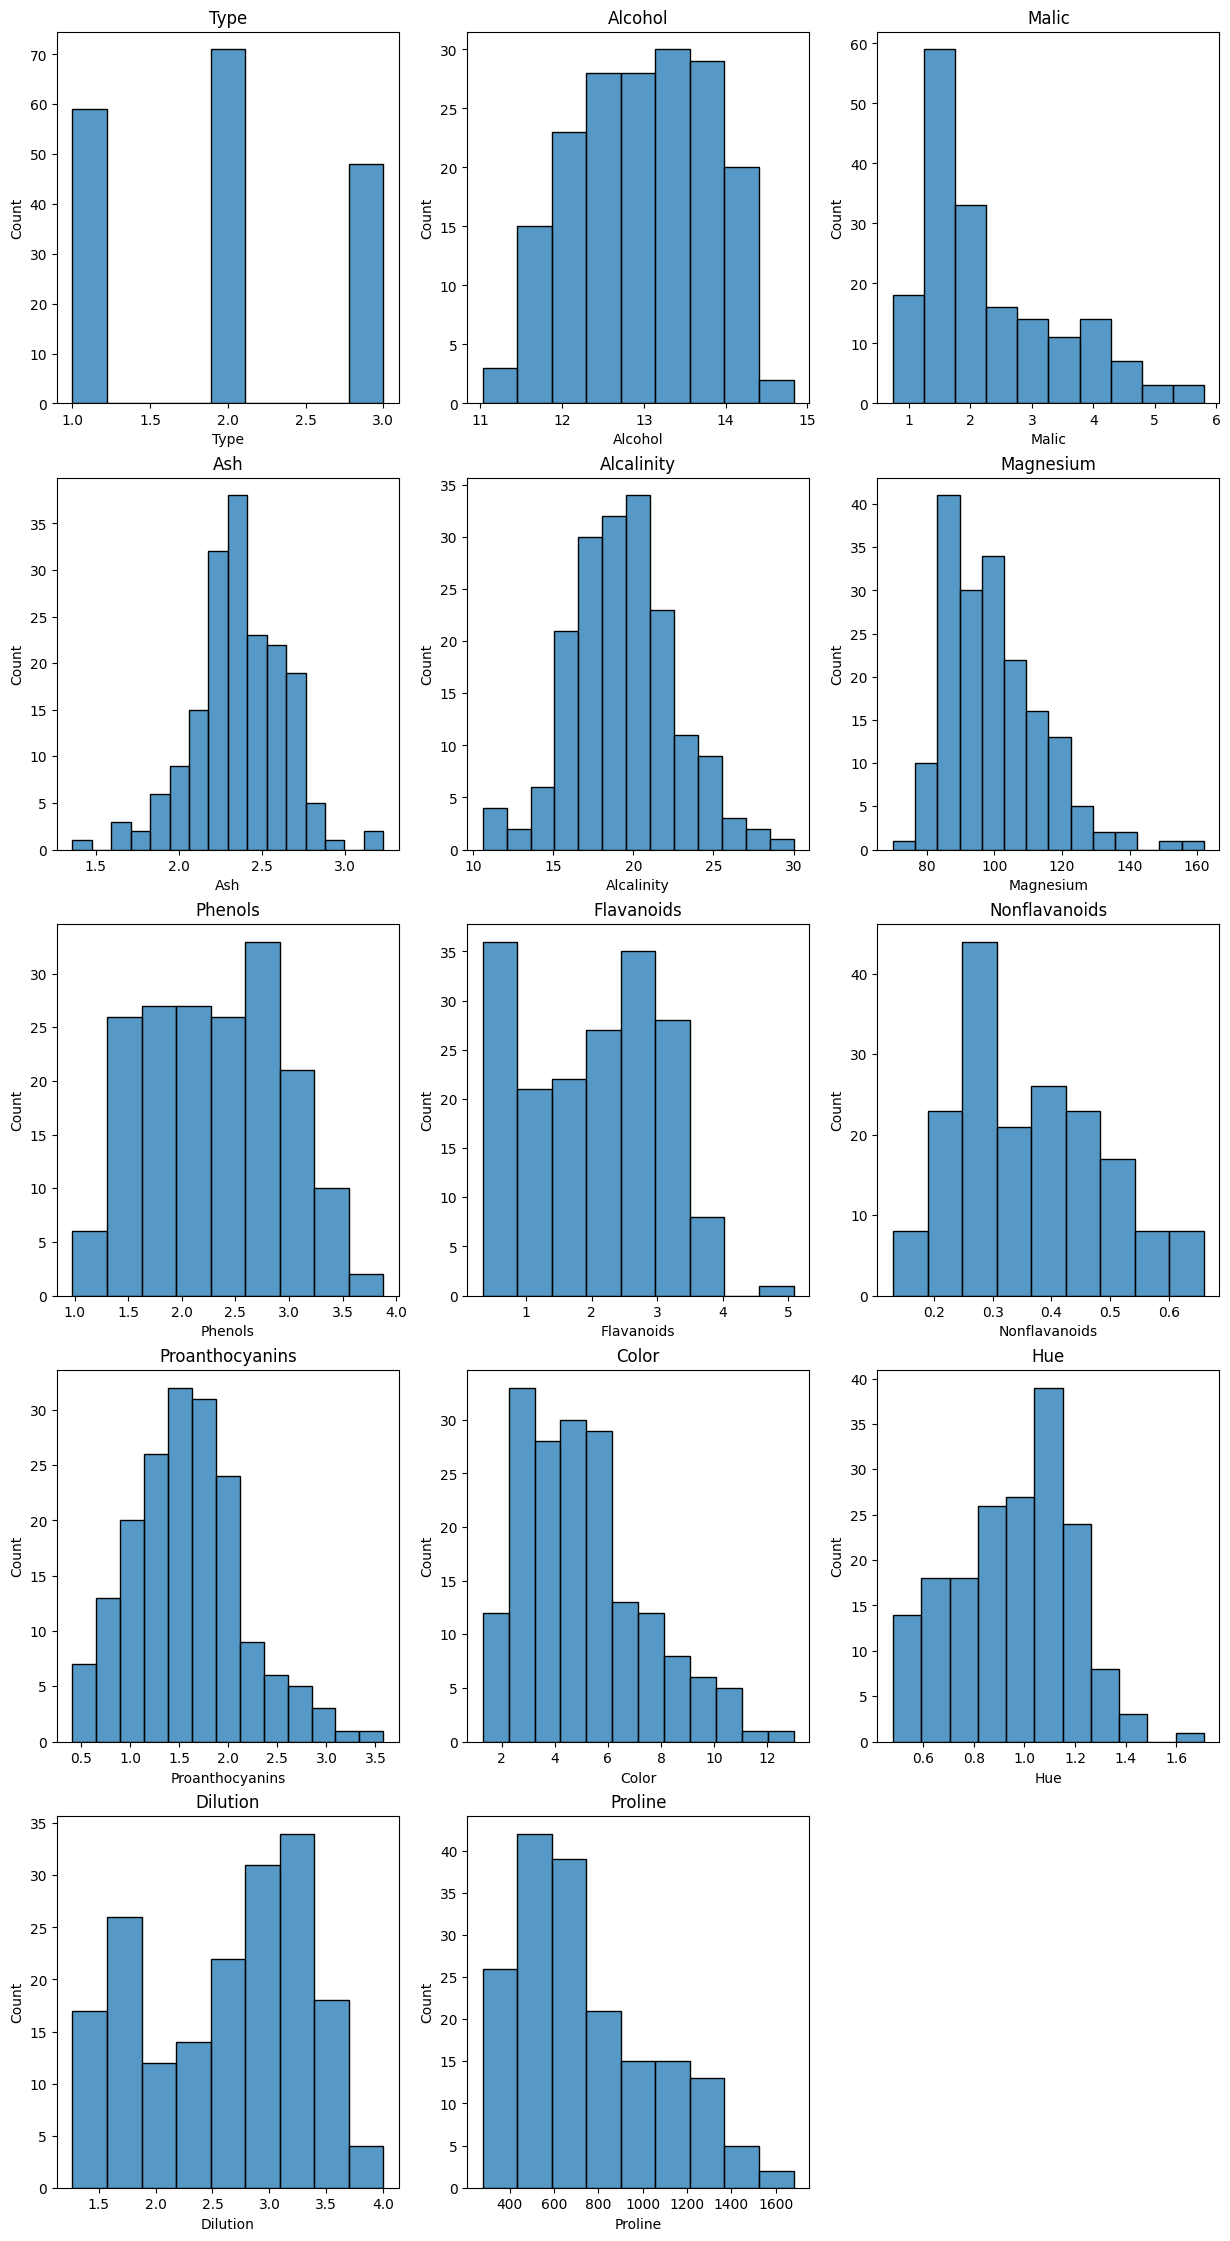

In [11]:
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,28))

for i in wine.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= wine, x= i)

    c = c + 1

plt.show()

## Numerical variables are usually of 2 type
## Continous variable and Discrete Variables

In [13]:
discrete_feature=[feature for feature in wine.columns if len(wine[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 1


In [14]:
continuous_feature=[feature for feature in wine.columns if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 13


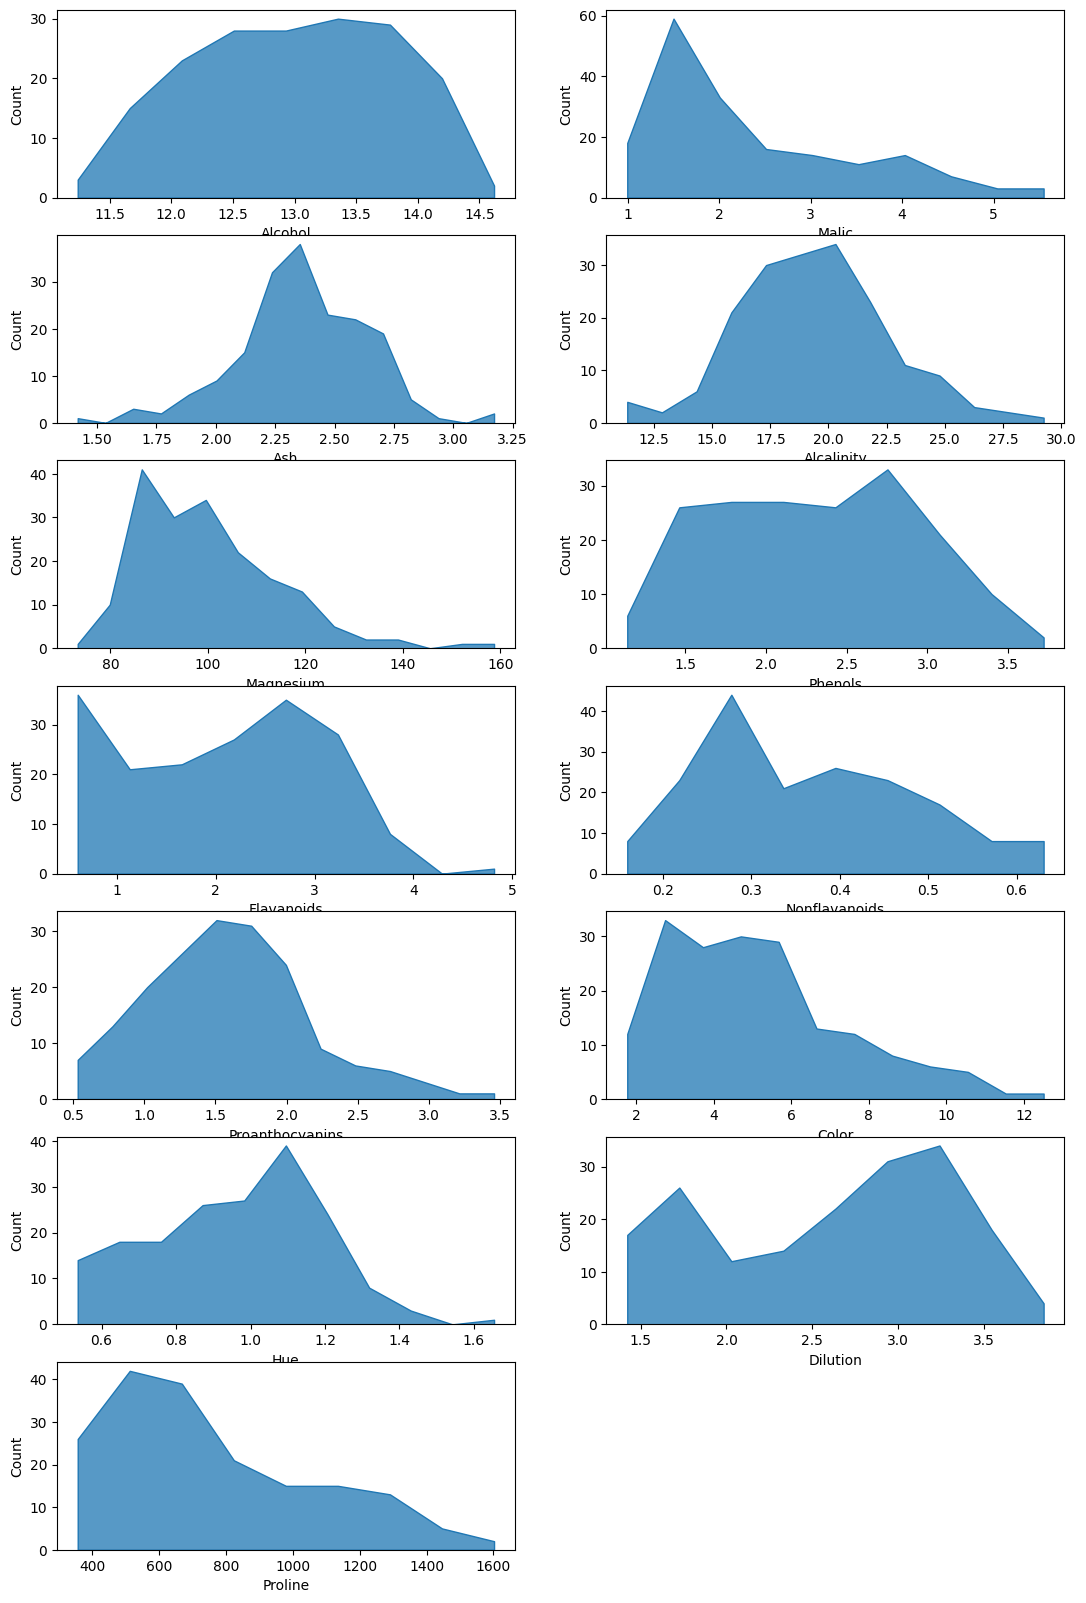

In [16]:
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i ,data= wine, element= "poly", palette="deep" )

    c = c + 1

plt.show()

## Checking for outliers

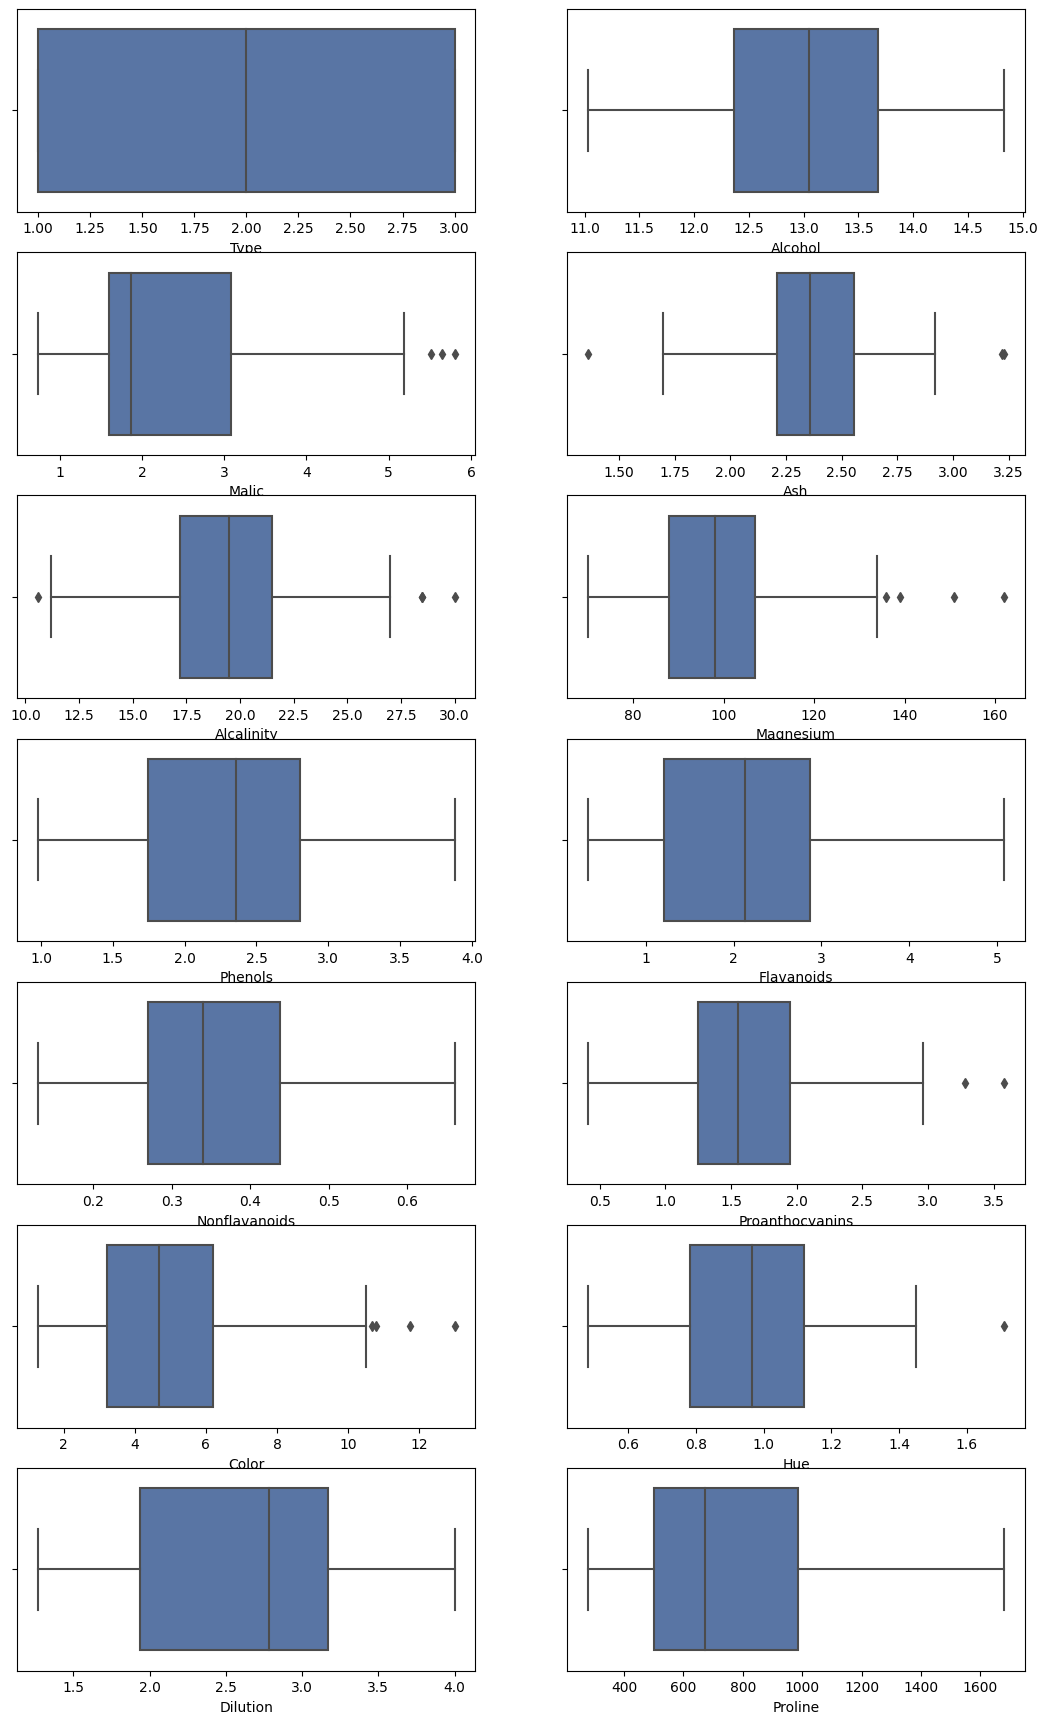

In [18]:
a = 16  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,50))

for i in wine.columns:
    plt.subplot(a, b, c)

    sns.boxplot(x= i ,data= wine, palette="deep" )

    c = c + 1

plt.show()

In [20]:
for i in wine.columns:
    s = wine[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"Details of {i} \n", "IQR = ", iqr, "\n", "IQR lower ", iqr_lower, "\n" , "IQR upper ",iqr_upper, "\n" ,"outliers = ", outliers, "\n"
         
    )

Details of Type 
 IQR =  2.0 
 IQR lower  -2.0 
 IQR upper  6.0 
 outliers =  {} 

Details of Alcohol 
 IQR =  1.3150000000000013 
 IQR lower  10.389999999999997 
 IQR upper  15.650000000000002 
 outliers =  {} 

Details of Malic 
 IQR =  1.48 
 IQR lower  -0.6174999999999997 
 IQR upper  5.3025 
 outliers =  {123: 5.8, 137: 5.51, 173: 5.65} 

Details of Ash 
 IQR =  0.34750000000000014 
 IQR lower  1.6887499999999998 
 IQR upper  3.0787500000000003 
 outliers =  {25: 3.22, 59: 1.36, 121: 3.23} 

Details of Alcalinity 
 IQR =  4.300000000000001 
 IQR lower  10.749999999999998 
 IQR upper  27.950000000000003 
 outliers =  {59: 10.6, 73: 30.0, 121: 28.5, 127: 28.5} 

Details of Magnesium 
 IQR =  19.0 
 IQR lower  59.5 
 IQR upper  135.5 
 outliers =  {69: 151, 73: 139, 78: 136, 95: 162} 

Details of Phenols 
 IQR =  1.0574999999999999 
 IQR lower  0.15625000000000022 
 IQR upper  4.3862499999999995 
 outliers =  {} 

Details of Flavanoids 
 IQR =  1.67 
 IQR lower  -1.2999999999999998 


## Replacing outlier with upper and lower limit

In [22]:
for i in wine.columns:
    s = wine[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr

    wine[i] = pd.DataFrame(np.where(wine[i] > iqr_upper, iqr_upper, np.where(wine[i] <  iqr_lower,  iqr_lower, wine[i])))

## outliers Removed

In [24]:
for i in wine.columns:
    s = wine[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"Details of {i} \n", "IQR = ", iqr, "\n", "IQR lower ", iqr_lower, "\n" , "IQR upper ",iqr_upper, "\n" ,"outliers = ", outliers, "\n"
         
    )

Details of Type 
 IQR =  2.0 
 IQR lower  -2.0 
 IQR upper  6.0 
 outliers =  {} 

Details of Alcohol 
 IQR =  1.3150000000000013 
 IQR lower  10.389999999999997 
 IQR upper  15.650000000000002 
 outliers =  {} 

Details of Malic 
 IQR =  1.48 
 IQR lower  -0.6174999999999997 
 IQR upper  5.3025 
 outliers =  {} 

Details of Ash 
 IQR =  0.34750000000000014 
 IQR lower  1.6887499999999998 
 IQR upper  3.0787500000000003 
 outliers =  {} 

Details of Alcalinity 
 IQR =  4.300000000000001 
 IQR lower  10.749999999999998 
 IQR upper  27.950000000000003 
 outliers =  {} 

Details of Magnesium 
 IQR =  19.0 
 IQR lower  59.5 
 IQR upper  135.5 
 outliers =  {} 

Details of Phenols 
 IQR =  1.0574999999999999 
 IQR lower  0.15625000000000022 
 IQR upper  4.3862499999999995 
 outliers =  {} 

Details of Flavanoids 
 IQR =  1.67 
 IQR lower  -1.2999999999999998 
 IQR upper  5.38 
 outliers =  {} 

Details of Nonflavanoids 
 IQR =  0.16749999999999998 
 IQR lower  0.018750000000000044 
 IQR upp

# PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [27]:
len(wine.columns) # all numerical columns

14

In [29]:
wine_normal = scale(wine) # Normalizing the numerical data 
wine_normal

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [30]:
pca = PCA(n_components = 14)
pca_values = pca.fit_transform(wine_normal)

In [31]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39807866, 0.18209648, 0.1013214 , 0.06619413, 0.05983257,
       0.04726317, 0.03753501, 0.02554538, 0.02108632, 0.01880492,
       0.01630103, 0.01233512, 0.00955758, 0.00404823])

In [32]:
# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([39.81, 58.02, 68.15, 74.77, 80.75, 85.48, 89.23, 91.78, 93.89,
       95.77, 97.4 , 98.63, 99.59, 99.99])

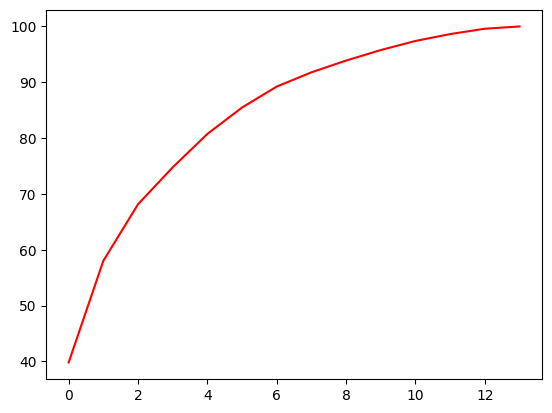

In [33]:

# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [34]:
# PCA scores
pca_values

array([[-3.56196816, -1.52896694, -0.13055758, ...,  0.55997527,
        -0.39156901,  0.19561901],
       [-2.54433006,  0.32999258, -2.04160282, ...,  0.35043521,
        -0.1850272 ,  0.13704005],
       [-2.80654586, -1.04222492,  1.01679147, ...,  0.04520172,
         0.04791671, -0.05646777],
       ...,
       [ 3.01960071, -2.8609113 , -0.97571878, ...,  0.65685345,
         0.03050905, -0.05789536],
       [ 2.73930763, -2.39059456, -0.56244889, ...,  0.32984111,
        -0.19203735,  0.07958432],
       [ 3.51359181, -2.79305368,  1.03399921, ..., -0.13247947,
        -0.13484047, -0.28243117]])

In [35]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = ['comp0', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9', 'comp10', 'comp11', 'comp12', 'comp13']

In [37]:
final_wine = pd.concat([wine.Type, pca_data.iloc[:, 0:6]], axis = 1)
final_wine

,Type,comp0,comp1,comp2,comp3,comp4,comp5
0,1.0,-3.561968,-1.528967,-0.130558,-0.102725,0.749767,-0.241582
1,1.0,-2.544330,0.329993,-2.041603,-0.448040,-0.193861,-0.959958
2,1.0,-2.806546,-1.042225,1.016791,0.740693,-0.410847,0.481234
3,1.0,-3.944287,-2.793264,-0.154956,0.634237,-0.235032,0.266787
4,1.0,-1.415866,-0.953430,2.117093,-0.479292,0.254285,-0.575020
...,...,...,...,...,...,...,...
173,3.0,3.575821,-2.165115,-0.378914,0.731787,-0.921869,-1.039551
174,3.0,2.951568,-1.793183,0.210665,0.422008,0.142318,-0.013560
175,3.0,3.019601,-2.860911,-0.975719,0.509405,1.123057,0.094408
176,3.0,2.739308,-2.390595,-0.562449,-0.479537,0.878447,1.114849


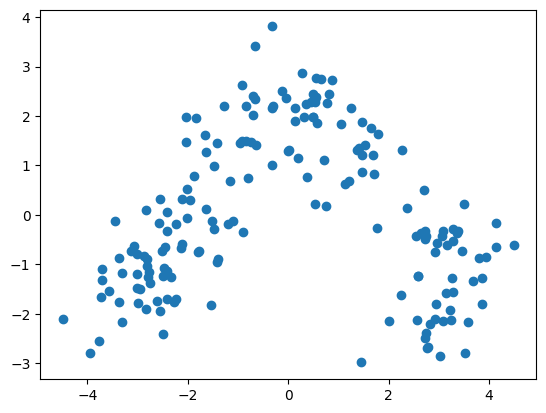

In [38]:
# Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x = final_wine.comp0, y = final_wine.comp1)

# Heirarchical-Clustering

In [40]:

# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [41]:
heir_data_norm = norm_func(final_wine.iloc[:,:])
heir_data_norm.describe()

,Type,comp0,comp1,comp2,comp3,comp4,comp5
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.499937,0.439144,0.436842,0.446758,0.371350,0.400211
std,0.387517,0.263689,0.235727,0.134965,0.137626,0.161950,0.157834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.262695,0.255792,0.341722,0.359206,0.259092,0.298648
50%,0.500000,0.497180,0.394553,0.422158,0.444408,0.335840,0.398230
75%,1.000000,0.760754,0.646706,0.519937,0.529185,0.436100,0.497222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
heir_data_norm.isna().sum()

Type     0
comp0    0
comp1    0
comp2    0
comp3    0
comp4    0
comp5    0
dtype: int64

In [43]:
z = linkage( heir_data_norm, method = "complete", metric = "euclidean")

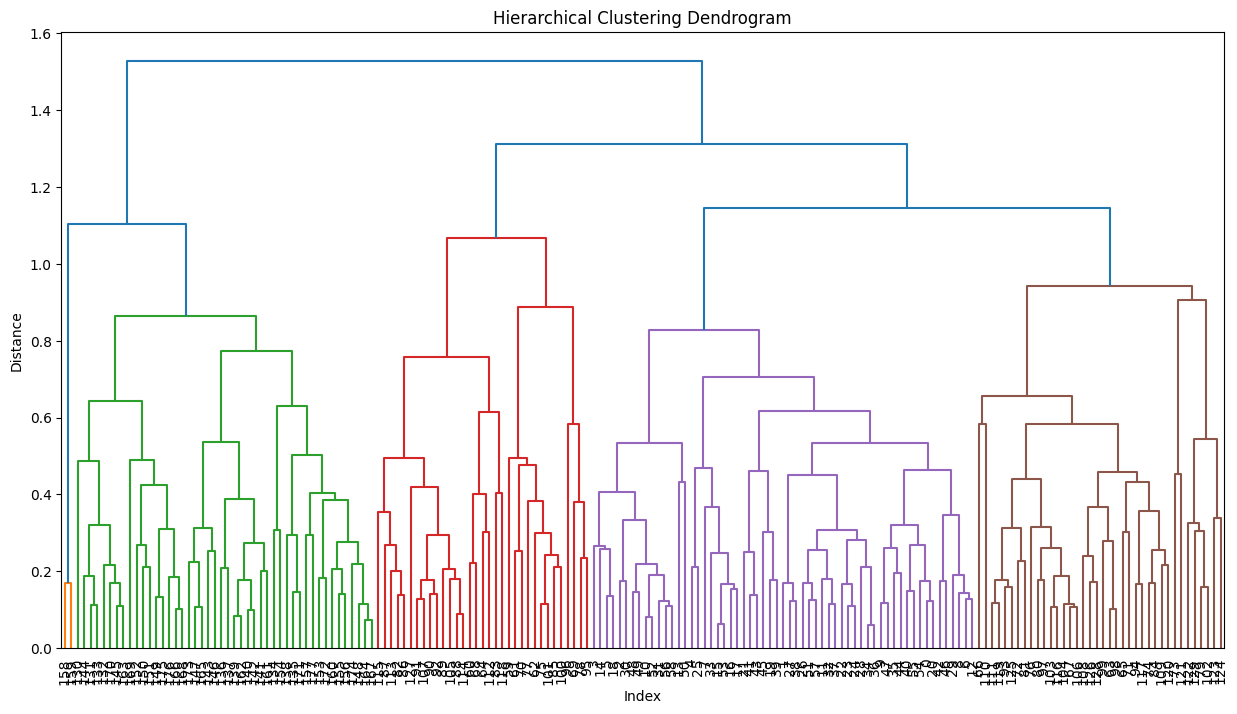

In [44]:
# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 90,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

## Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram

In [47]:
h_complete = AgglomerativeClustering(n_clusters = 8, linkage = 'complete', affinity = "euclidean").fit(heir_data_norm) 
h_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 0, 0, 6, 5, 6,
       6, 6, 5, 0, 0, 6, 6, 7, 6, 0, 6, 0, 0, 3, 6, 6, 5, 5, 6, 0, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 0, 0, 6, 6, 6, 0, 0, 3, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 3, 3, 3, 6, 6, 5, 6, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [48]:
cluster_labels = pd.Series(h_complete.labels_)
final_wine['clust'] = cluster_labels # creating a new column and assigning it to new column

In [50]:
final_wine.iloc[:, :].groupby(final_wine.clust).mean()

,Type,comp0,comp1,comp2,comp3,comp4,comp5
clust,,,,,,,
0,2.0,0.087091,1.464907,-1.069365,-0.738461,1.298637,0.010006
1,1.0,-2.596712,-0.989462,-0.139894,-0.160587,-0.222395,-0.241313
2,3.0,3.136196,-1.195452,-0.244219,0.053279,0.136247,-0.009756
3,2.0,0.372430,1.047918,1.432753,1.838111,-0.256597,-1.016186
4,3.0,1.729559,-2.563961,0.947358,1.010481,-0.843196,3.000225
5,2.0,1.088860,1.766366,0.756642,-0.856446,-0.687782,0.195948
6,2.0,-0.534635,1.944635,-0.009078,0.688722,0.138571,0.326954
7,2.0,-1.811531,-0.250340,4.018907,0.020741,1.398088,0.462640


## Plot of Heirarichical data clustering 

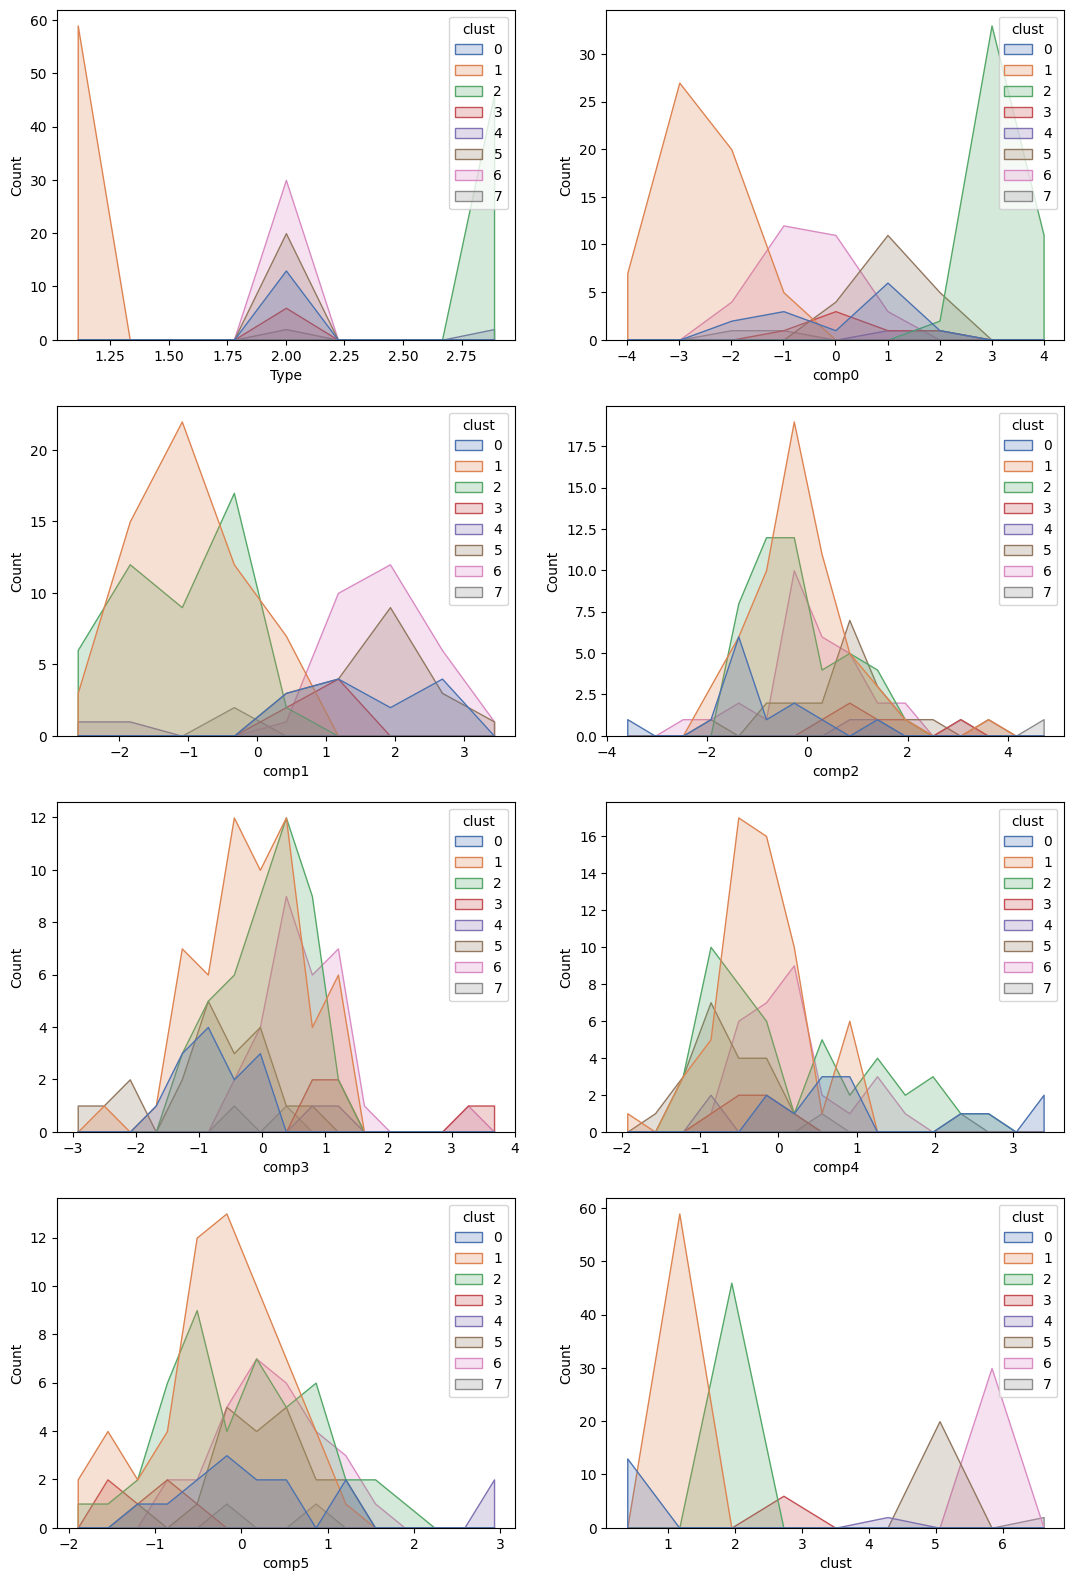

In [52]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,30))

for i in final_wine.columns:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= final_wine, hue= "clust",palette="deep", element= "poly" )

    c = c + 1

plt.show()